# Mathieu VANDECASTEELE - Systeme de recommandation

In [1]:
import scipy.io as io
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
import pandas as pd
from numpy import random
import scipy
import scipy.sparse

In [3]:
data_shape = (943, 1682)

In [4]:
df = pd.read_csv("u.data", sep="\t", header=-1)
values = df.values
values[:, 0:2] -= 1

In [5]:
ind = np.random.permutation(range(100000))
inda = ind[0:90000]
indt = ind[90001:100000]

In [6]:
M = scipy.sparse.csr_matrix((values[:, 2], (values[:, 0], values[:, 1])), dtype=np.float, shape=data_shape)
Ma = scipy.sparse.csr_matrix((values[inda, 2], (values[inda, 0], values[inda, 1])), dtype=np.float, shape=data_shape)
Mt = scipy.sparse.csr_matrix((values[indt, 2], (values[indt, 0], values[indt, 1])), dtype=np.float, shape=data_shape)

nt = np.sum(Mt>.5)


In [7]:
moy = np.sum(Ma)/np.sum(Ma>.5)
print('moyenne : {0:.3f}'.format(moy))

moyenne : 3.531


In [8]:
Mask = Ma>.5
Maskt = Mt>.5

In [9]:
Merr = Mt - Maskt.multiply(moy)
err = np.sum(Merr.power(2))/nt
print('Erreur de base : {0:.3f}'.format(err))

Erreur de base : 1.273


In [10]:
Mc = Ma - moy*Mask
Mt = Mt - moy*Maskt

In [11]:
U,D,Vt = scipy.sparse.linalg.svds(Mc,k=50)
U = U[:, ::-1]
D = D[:: -1]
Vt = Vt[::-1, :]

### SVD

In [12]:
# SVD
from time import time
p = 20
err = np.zeros(p)
t0 = time()
for i in range(1,p+1):
    Mh = (U[:,0:i]@np.diag(D[0:i]))@Vt[0:i,:]
    Merr = Mt - Maskt.multiply(Mh)
    err[i-1] = np.sum(Merr.power(2))/nt
t1 = time()
print('\n temps de calcul : {0:.3f}'.format( t1 - t0 ))


 temps de calcul : 0.168


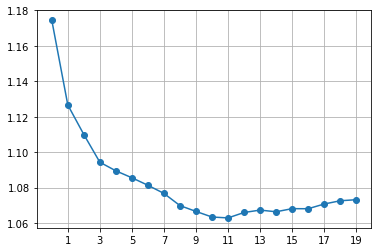

In [17]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(err,'o-')
plt.grid(True)
plt.xticks(np.arange(1, p, step=2))
plt.show()

In [14]:
nb_opt_factors = err.argmin()
print(nb_opt_factors)

11


### SVD Pondérée

In [15]:
#SVD Pondérée
Mest = 0*Mc
errw = np.zeros(p)
un = np.ones((943,1682))
un_m_Mask = scipy.sparse.csr_matrix(un-Mask)
p = 20
t0 = time()
for i in range(1,p+1):
    for ii in range(1,30):
        Y = Mc + un_m_Mask.multiply(Mest)
        U,D,Vt = scipy.sparse.linalg.svds(Y,k=i)
        Mest = (U@np.diag(D))@Vt
    Merr = Mt - Maskt.multiply(Mest)
    errw[i-1] = np.sum(Merr.power(2))/nt
t1 = time()
print('\n temps de calcul : {0:.3f}'.format( t1 - t0 ))


 temps de calcul : 113.296


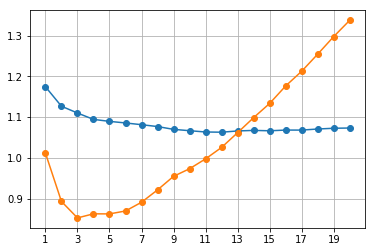

In [16]:
plt.plot(range(1,p+1),err,'o-')
plt.plot(range(1,p+1),errw,'o-')
plt.grid(True)
plt.xticks(np.arange(1,p,step=2))
plt.show()